# Decision Tree for faces classification

## Fetch the data

In [1]:
import os
import pandas as pd

In [2]:
os.getcwd()     # be in the root of the project

'/home/franzele/Desktop/univ_lille/sd/facial_emotion_classification_sd/scripts'

In [3]:
os.chdir("..")

In [4]:
PATH_TO_DATA = "CK+_lands/CK+_centered"
PATH_TO_LABEL = "CK+_lands/CK+/emotion.csv"

In [5]:
def load_last_faces(data, labels, only_labelled=True):
    def fuse_df(base_df, visage_dir, tmp_id, data, target=-1):
        coords = {str(i):x for i, x in enumerate(data.to_numpy())}
        new_line = {
            "subject": visage_dir,
            "file": tmp_id,
        }
        new_line = new_line | coords
        new_line = pd.DataFrame(new_line, index=[0])

        # new_line["coords"] = new_line.iloc[:, 2:].to_numpy().tolist()

        # new_line = new_line.drop([str(i) for i in range(136)], axis=1)
        return pd.concat([base_df, new_line])

    last_faces = pd.DataFrame()
    labels = pd.read_csv(labels, delimiter=";")

    for visage_dir in os.listdir(data):
        visage_data = pd.read_csv(os.path.join(data, visage_dir, "omlands.csv"), delimiter=";", header=None)
        tmp_id = visage_data.iloc[0, 0]
        for row_id in visage_data.index:
            if visage_data.iloc[row_id, 0] != tmp_id:
                last_faces = fuse_df(last_faces, visage_dir, tmp_id, visage_data.iloc[row_id-1, 1:])
                tmp_id = visage_data.iloc[row_id, 0]
        last_faces = fuse_df(last_faces, visage_dir, tmp_id, visage_data.iloc[row_id-1, 1:])


    last_faces = pd.merge(last_faces, labels, on=["subject", "file"], how="inner" if only_labelled else "outer")
    
    return last_faces

In [6]:
data = load_last_faces(PATH_TO_DATA, PATH_TO_LABEL)

In [7]:
data.loc[:, "0":"135"]

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,-239.50,409.0,-232.50,475.0,-220.50,539.0,-205.50,603.0,-183.50,661.0,...,23.50,575.0,61.50,619.0,24.50,649.0,2.50,652.0,-19.50,649.0
1,-241.25,412.0,-235.25,470.0,-227.25,527.0,-215.25,586.0,-194.25,638.0,...,23.75,564.0,72.75,588.0,23.75,600.0,-2.25,602.0,-27.25,599.0
2,-242.00,406.0,-236.00,464.0,-228.00,520.0,-218.00,577.0,-200.00,628.0,...,22.00,560.0,64.00,573.0,22.00,565.0,0.00,566.0,-23.00,563.0
3,-246.25,397.0,-242.25,453.0,-235.25,509.0,-226.25,569.0,-206.25,622.0,...,24.75,558.0,81.75,571.0,22.75,596.0,-5.25,598.0,-34.25,593.0
4,-207.75,455.0,-203.75,514.0,-194.75,575.0,-178.75,633.0,-157.75,689.0,...,15.25,634.0,53.25,673.0,16.25,718.0,-6.75,722.0,-28.75,717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,-202.25,320.0,-195.25,378.0,-184.25,433.0,-173.25,489.0,-157.25,542.0,...,20.75,531.0,60.75,539.0,21.75,533.0,3.75,534.0,-11.25,533.0
353,-205.75,326.0,-198.75,386.0,-187.75,446.0,-175.75,503.0,-158.75,558.0,...,23.25,505.0,65.25,540.0,24.25,562.0,4.25,564.0,-13.75,561.0
354,-206.25,320.0,-199.25,376.0,-189.25,430.0,-178.25,483.0,-161.25,532.0,...,26.75,478.0,69.75,481.0,26.75,478.0,6.75,480.0,-13.25,479.0
355,-218.25,407.0,-211.25,473.0,-201.25,537.0,-190.25,597.0,-172.25,654.0,...,23.75,608.0,69.75,630.0,23.75,605.0,0.75,606.0,-20.25,604.0


In [8]:
data.where(data["subject"] == "S005").dropna()

,subject,file,0,1,2,3,4,5,6,7,...,127,128,129,130,131,132,133,134,135,emotion
13,S005,1.0,-320.25,390.0,-321.25,467.0,-313.25,545.0,-294.25,622.0,...,656.0,77.75,664.0,28.75,663.0,-5.25,667.0,-38.25,662.0,5.0


## Training 

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
import numpy as np

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, "0":"135"], data["emotion"])

In [12]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

In [13]:
tree.score(X_train, y_train)

0.6629213483146067

In [14]:
tree.score(X_test, y_test)

0.5

[Text(0.5, 0.875, 'x[96] <= -89.875\ngini = 0.807\nsamples = 267\nvalue = [76, 36, 56, 24, 29, 46]'),
 Text(0.25, 0.625, 'x[109] <= 683.0\ngini = 0.483\nsamples = 106\nvalue = [73, 21, 2, 4, 3, 3]'),
 Text(0.125, 0.375, 'x[42] <= -29.875\ngini = 0.36\nsamples = 94\nvalue = [73, 18, 0, 2, 1, 0]'),
 Text(0.0625, 0.125, 'gini = 0.217\nsamples = 74\nvalue = [65, 8, 0, 0, 1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.58\nsamples = 20\nvalue = [8, 10, 0, 2, 0, 0]'),
 Text(0.375, 0.375, 'x[130] <= 28.375\ngini = 0.792\nsamples = 12\nvalue = [0, 3, 2, 2, 2, 3]'),
 Text(0.3125, 0.125, 'gini = 0.741\nsamples = 9\nvalue = [0, 0, 2, 2, 2, 3]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.75, 0.625, 'x[113] <= 667.5\ngini = 0.766\nsamples = 161\nvalue = [3, 15, 54, 20, 26, 43]'),
 Text(0.625, 0.375, 'x[120] <= -71.375\ngini = 0.75\nsamples = 87\nvalue = [3, 12, 5, 14, 19, 34]'),
 Text(0.5625, 0.125, 'gini = 0.551\nsamples = 14\nvalue = [1, 9, 0, 1, 2, 1]'),
 Text(

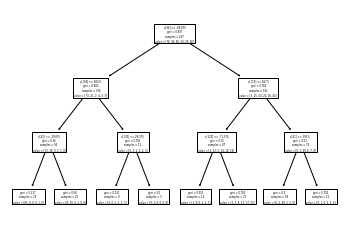

In [15]:
plot_tree(tree)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rd_forest = RandomForestClassifier(max_depth=1, n_estimators=1000).fit(X_train, y_train)

In [18]:
rd_forest.score(X_train, y_train)

0.4943820224719101

In [19]:
rd_forest.score(X_test, y_test)

0.3888888888888889

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(RandomForestClassifier(max_depth=5, n_estimators=1000), data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.6470657276995305

In [22]:
cross_val_score(DecisionTreeClassifier(), data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.5153364632237872

In [23]:
100 / len(data["emotion"].unique())

16.666666666666668

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler().fit(data.loc[:, "0":"135"])

In [26]:
data.loc[:, "0":"135"]

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,-239.50,409.0,-232.50,475.0,-220.50,539.0,-205.50,603.0,-183.50,661.0,...,23.50,575.0,61.50,619.0,24.50,649.0,2.50,652.0,-19.50,649.0
1,-241.25,412.0,-235.25,470.0,-227.25,527.0,-215.25,586.0,-194.25,638.0,...,23.75,564.0,72.75,588.0,23.75,600.0,-2.25,602.0,-27.25,599.0
2,-242.00,406.0,-236.00,464.0,-228.00,520.0,-218.00,577.0,-200.00,628.0,...,22.00,560.0,64.00,573.0,22.00,565.0,0.00,566.0,-23.00,563.0
3,-246.25,397.0,-242.25,453.0,-235.25,509.0,-226.25,569.0,-206.25,622.0,...,24.75,558.0,81.75,571.0,22.75,596.0,-5.25,598.0,-34.25,593.0
4,-207.75,455.0,-203.75,514.0,-194.75,575.0,-178.75,633.0,-157.75,689.0,...,15.25,634.0,53.25,673.0,16.25,718.0,-6.75,722.0,-28.75,717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,-202.25,320.0,-195.25,378.0,-184.25,433.0,-173.25,489.0,-157.25,542.0,...,20.75,531.0,60.75,539.0,21.75,533.0,3.75,534.0,-11.25,533.0
353,-205.75,326.0,-198.75,386.0,-187.75,446.0,-175.75,503.0,-158.75,558.0,...,23.25,505.0,65.25,540.0,24.25,562.0,4.25,564.0,-13.75,561.0
354,-206.25,320.0,-199.25,376.0,-189.25,430.0,-178.25,483.0,-161.25,532.0,...,26.75,478.0,69.75,481.0,26.75,478.0,6.75,480.0,-13.25,479.0
355,-218.25,407.0,-211.25,473.0,-201.25,537.0,-190.25,597.0,-172.25,654.0,...,23.75,608.0,69.75,630.0,23.75,605.0,0.75,606.0,-20.25,604.0


In [27]:
data.loc[:, "0":"135"] = scaler.transform(data.loc[:, "0":"135"])

In [28]:
data.loc[:, "0":"135"]

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,-0.506836,-0.013565,-0.393482,0.133089,-0.247037,0.253042,-0.060828,0.371987,0.074523,0.412879,...,-0.273023,-0.561299,-0.761666,0.052568,-0.160539,0.293030,0.522339,0.285250,0.761581,0.297666
1,-0.580436,0.051291,-0.512116,0.022953,-0.546897,-0.011034,-0.500782,0.003521,-0.429222,-0.069156,...,-0.238324,-0.776199,-0.172397,-0.524016,-0.257953,-0.533075,-0.418204,-0.551928,-0.320789,-0.545989
2,-0.611979,-0.078421,-0.544470,-0.109210,-0.580215,-0.165078,-0.624871,-0.191549,-0.698668,-0.278736,...,-0.481216,-0.854344,-0.630718,-0.803008,-0.485254,-1.123150,0.027316,-1.154696,0.272769,-1.153420
3,-0.790722,-0.272988,-0.814092,-0.351509,-0.902287,-0.407147,-0.997140,-0.364944,-0.991543,-0.404484,...,-0.099528,-0.893416,0.299018,-0.840207,-0.387839,-0.600512,-1.012230,-0.618902,-1.298414,-0.647227
4,0.828479,0.980893,0.846779,0.992148,0.896874,1.045268,1.146224,1.022221,1.281170,0.999703,...,-1.418085,0.591343,-1.193797,1.056940,-1.232099,1.456321,-1.309244,1.457300,-0.530280,1.445036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,1.059793,-1.937624,1.213465,-2.003548,1.363323,-2.079626,1.394403,-2.098901,1.304600,-2.081124,...,-0.654710,-1.420897,-0.800951,-1.435390,-0.517726,-1.662647,0.769850,-1.690490,1.913782,-1.659613
353,0.912593,-1.807912,1.062477,-1.827330,1.207840,-1.793544,1.281595,-1.795459,1.234310,-1.745796,...,-0.307722,-1.928840,-0.565243,-1.416790,-0.193010,-1.173728,0.868854,-1.188183,1.564630,-1.187166
354,0.891565,-1.937624,1.040907,-2.047602,1.141204,-2.145645,1.168786,-2.228948,1.117160,-2.290705,...,0.178063,-2.456321,-0.329536,-2.514160,0.131705,-2.589908,1.363877,-2.594642,1.634460,-2.570760
355,0.386879,-0.056802,0.523233,0.089034,0.608120,0.209029,0.627305,0.241940,0.601699,0.266173,...,-0.238324,0.083399,-0.329536,0.257163,-0.257953,-0.448778,0.175823,-0.484954,0.656835,-0.461623


In [29]:
cross_val_score(RandomForestClassifier(max_depth=5, n_estimators=1000), data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.6415492957746479

In [30]:
cross_val_score(DecisionTreeClassifier(), data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.5155712050078247

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    "max_depth": np.arange(2, 11),
    "criterion": ["gini", "entropy"],
    "n_estimators": [100, 500, 1000]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': [100, 500, 1000]})

In [33]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [37]:
best_rf = RandomForestClassifier(max_depth=8, criterion="entropy")
cross_val_score(best_rf, data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.6527777777777778

## Test avec Adaboost parce que j'ai vu un truc sur statquest

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
cross_val_score(AdaBoostClassifier(), data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.4843896713615024